### Principal Component Analysis on ASX 200 ###

Workbook to explore sklearn's PCA functionality. 

Reconstructing ASX 200 using 5 components 

In [41]:
#import libraries and data 
import pandas as pd
import numpy as np
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

df = pd.read_csv('ASX_200_Daily.csv', index_col = 0, parse_dates = True)

df

,XJO,CBA,CSL,BHP,WBC,NAB,ANZ,WOW,MQG,WES,...,MYX,WSA,OML,SXL,EHE,HUB,PLS,ORE,GXY,SDA
2008-01-01,6339.836,58.846,36.36,36.367,27.603,35.923,27.46,33.658,74.935,26.770,...,0.2986,5.45,NaN,3.0954,NaN,5.9926,0.300,0.2411,1.8203,NaN
2008-01-02,6353.162,58.547,36.57,36.512,27.741,35.629,27.57,33.668,75.722,26.935,...,0.2986,5.57,NaN,3.1104,NaN,5.9926,0.300,0.2226,1.8203,NaN
2008-01-03,6290.713,57.502,36.50,36.331,27.277,35.125,27.33,33.371,72.477,27.067,...,0.3092,5.55,NaN,3.0954,NaN,5.6772,0.325,0.2226,1.7100,NaN
2008-01-04,6306.817,57.790,35.49,37.010,27.326,35.486,27.41,33.321,71.985,26.948,...,0.3092,5.66,NaN,3.0804,NaN,5.6772,0.375,0.2411,1.8203,NaN
2008-01-07,6161.624,56.954,34.50,36.258,26.842,34.507,26.69,32.856,70.205,26.446,...,0.3092,5.40,NaN,2.9680,NaN,5.6772,0.325,0.2318,1.8479,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-26,6787.530,80.740,279.73,37.900,24.860,26.150,24.94,39.180,136.300,41.780,...,0.4500,2.90,2.96,0.9250,2.73,11.1600,0.305,2.6500,0.9650,0.855
2019-11-27,6850.601,81.690,279.99,38.350,24.810,26.180,25.06,39.680,137.360,42.400,...,0.4450,2.93,3.01,0.9300,2.70,11.3000,0.300,2.5700,0.9800,0.825
2019-11-28,6863.998,81.600,282.99,38.500,24.700,26.180,24.87,39.650,138.050,42.410,...,0.4400,2.91,3.06,0.9250,2.71,11.1800,0.300,2.5700,0.9450,0.810
2019-11-29,6845.996,80.820,283.48,38.230,24.520,25.890,24.84,39.760,138.050,42.370,...,0.4650,2.78,3.13,0.9600,2.69,10.8600,0.300,2.5200,0.9250,0.810


In [23]:
#components
daily_components  = df.iloc[-252:,1:16]
daily_components

,CBA,CSL,BHP,WBC,NAB,ANZ,WOW,MQG,WES,TLS,TCL,RIO,WPL,FMG,GMG
2018-12-14,68.81,180.15,32.40,24.88,23.69,24.80,28.31,113.18,31.28,2.87,11.89,74.57,31.16,3.8452,10.93
2018-12-17,69.26,183.74,33.53,24.65,23.55,24.41,28.64,113.26,31.94,2.90,11.96,76.17,31.14,3.9012,11.09
2018-12-18,68.60,181.37,33.50,24.31,23.13,23.69,28.48,110.63,32.09,2.91,11.86,76.05,30.75,3.8452,10.89
2018-12-19,69.40,178.15,33.49,24.33,23.32,23.94,28.66,109.91,31.95,2.88,11.90,76.60,30.19,3.8545,10.95
2018-12-20,68.92,175.65,32.62,24.07,23.09,23.55,28.72,107.29,31.88,2.85,11.70,75.11,29.69,3.8172,11.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-26,80.74,279.73,37.90,24.86,26.15,24.94,39.18,136.30,41.78,3.61,15.29,95.98,34.28,9.8100,14.45
2019-11-27,81.69,279.99,38.35,24.81,26.18,25.06,39.68,137.36,42.40,3.71,15.43,97.00,34.25,9.7900,14.75
2019-11-28,81.60,282.99,38.50,24.70,26.18,24.87,39.65,138.05,42.41,3.86,15.38,97.39,34.56,9.7900,14.74
2019-11-29,80.82,283.48,38.23,24.52,25.89,24.84,39.76,138.05,42.37,3.86,15.35,96.90,34.51,9.7300,14.82


In [24]:
# ASX 200 data
asx = pd.DataFrame(df.iloc[-252:,0])
asx

,XJO
2018-12-14,5601.976
2018-12-17,5658.273
2018-12-18,5589.469
2018-12-19,5580.596
2018-12-20,5505.822
...,...
2019-11-26,6787.530
2019-11-27,6850.601
2019-11-28,6863.998
2019-11-29,6845.996


In [26]:
fn_z_score = lambda x: (x - x.mean()) / x.std()

df_z_components = daily_components.apply(fn_z_score)
fitted_pca = KernelPCA().fit(df_z_components)

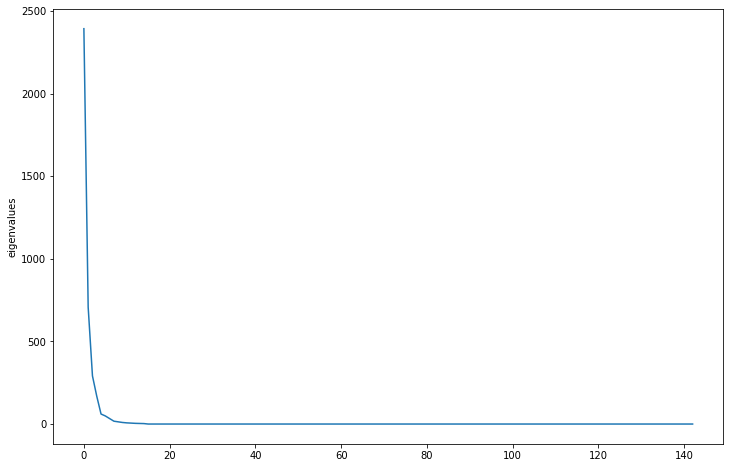

In [27]:
%matplotlib inline


plt.rcParams['figure.figsize'] = (12,8)
plt.plot(fitted_pca.lambdas_)
plt.ylabel('eigenvalues')
plt.show();

In [38]:
fn_weighted_avg = lambda x: x / x.sum()
weighted_values = fn_weighted_avg(fitted_pca.lambdas_)[:5]

print(weighted_values)

[0.63552533 0.18784263 0.07739722 0.04479119 0.0160866 ]


In [39]:
weighted_values.sum()

0.9616429746268255

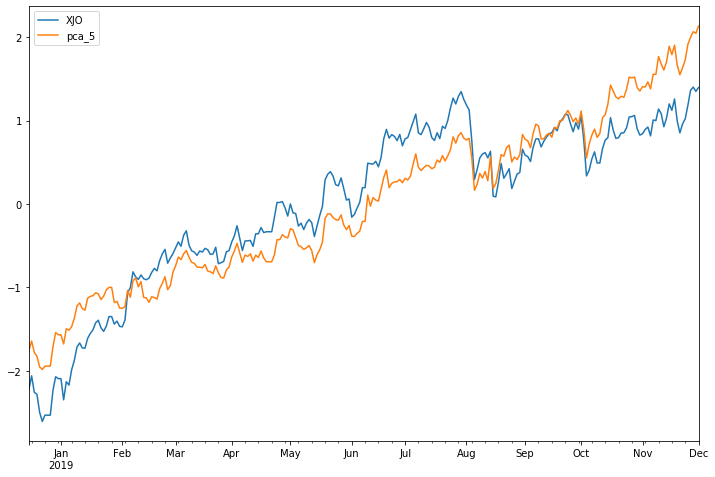

In [42]:
# Compare reconstructed values w asx 200

kernel_pca = KernelPCA(n_components=5).fit(df_z_components)
pca_5 = kernel_pca.transform(-daily_components)

weights = fn_weighted_avg(kernel_pca.lambdas_)
reconstructed_values = np.dot(pca_5, weights)

# Combine DJIA and PCA index for comparison
df_combined = asx.copy()
df_combined['pca_5'] = reconstructed_values
df_combined = df_combined.apply(fn_z_score)
df_combined.plot(figsize=(12, 8));